# **Data Visualization of my Hinge Like Activity**
Hello! The point of this project is to place my Hinge Data into a Data Frame and using libraries like [matplotlib](https://matplotlib.org/stable/index.html) to create graphs/charts to show the data as a whole.

The outcome of the project is to show the percentage of matches that come from me sending likes to the amount that come from others sending me likes.

### **Normalizing and Cleaning The Acquired Hinge Data**
The objective in this chunk of code is to organize that data and normalize it so that the data can easily be interpreted by the programmer and also to make it easier to use visualization libraries later.

In [25]:
""" 
This code is borrowed from Michael Johnson at gist.github.com/mistermichaelll
The code is at https://gist.github.com/mistermichaelll/3afcc33188f29576915243a5a2ea2a72
"""

import os
import json
import datetime as dt
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

with open(os.path.join(sys.path[0], "matches.json")) as m:
    matches = json.load(m)

# normalize the JSON using pandas
data = pd.json_normalize(matches)

# ==================================
# Gathering the Data 
# ==================================

# We are going to pull apart each type of "like" you can receive on the app from the 
# messy JSON file that Hinge sends us.
# Basically, the logic I'm using is as follows: 
# 
# - If "like" is not null, and "match" is not null, then this is where we sent a like and got a match.
# - If "like" is not null, and "match" is null, then this is where we sent a like and got no match.
# - If "match" is not null, and "like" is null, then this is where we received a like and got a match.
# - If "match" is null, and "like" is null, then this is where we redeived a like but did not match.

# outgoing likes, match
outgoing_matches = data.loc[(data["like"].isna() == False) & (data["match"].isna() == False)].reset_index()

# outgoing likes, no match
outgoing_no_matches = data.loc[(data["like"].isna() == False) & (data["match"].isna() == True)].reset_index()

# incoming likes, match
incoming_match = data.loc[(data["match"].isna() == False) & (data["like"].isna() == True)].reset_index()

# incoming likes, no match
incoming_no_match = data.loc[(data["like"].isna() == True) & (data["match"].isna() == True)].reset_index()

# ==================================
# Quick Stats
# -----------
# This prints out some quick stats
# from the data we're working with.
# ==================================
""" print("Total Likes Sent:", len(outgoing_matches) + len(outgoing_no_matches))
print("Total Matches from Likes Sent:", len(outgoing_matches))
print("Match % from Likes Sent:", round(len(outgoing_matches) / (len(outgoing_matches) + len(outgoing_no_matches)) * 100), "%")

print("Total Likes Received:", len(incoming_match) + len(incoming_no_match))
print("Total Matches from Likes Received:", len(incoming_match))
print("Match % from Likes Received:", round(len(incoming_match) / (len(incoming_match) + len(incoming_no_match)) * 100), "%")
print('\n') """

# ==================================
# Creating a Clean Dataframe 
# --------------------------
# Really, all I want is a clean
# dataframe that has the timestamp, 
# the date without the time, and 
# the type of like we're dealing with.
# ==================================

# Create lists of timestamps from our data

# sent likes, match
# -----------------
sent_like_timestamps = []
for i in range(0, len(outgoing_matches)):
    sent_like_timestamps.append(outgoing_matches["like"][i][0]["timestamp"])
    
# sent like, no match    
# --------------------
sent_like_no_match_timestamps = []
for i in range(0, len(outgoing_no_matches)):
    sent_like_no_match_timestamps.append(outgoing_no_matches["like"][i][0]["timestamp"])
    
# received like, no match
rec_no_match_timestamps = []
for i in range(0, len(incoming_no_match)):
    rec_no_match_timestamps.append(incoming_no_match["block"][i][0]["timestamp"])
    
# received like, match
rec_match_timestamps = []
for i in range(0, len(incoming_match)):
    rec_match_timestamps.append(incoming_match["match"][i][0]["timestamp"])

# take these lists of timestamps, create a dataframe with the timestamp and "like type"
sent_match = pd.DataFrame({"Timestamp":sent_like_timestamps, "Type":"Sent Like, Match"})
sent_no_match = pd.DataFrame({"Timestamp":sent_like_no_match_timestamps, "Type":"Sent Like, No Match"})
rec_match = pd.DataFrame({"Timestamp":rec_match_timestamps, "Type":"Received Like, Match"})
rec_no_match = pd.DataFrame({"Timestamp":rec_no_match_timestamps, "Type":"Received Like, No Match"})

dfs = [sent_match, sent_no_match, rec_match, rec_no_match]

# create clean dataset
clean_data = pd.concat(dfs).reset_index().drop('index', axis = 1)
clean_data["Timestamp"] = pd.to_datetime(clean_data["Timestamp"])
clean_data["Date"] = clean_data["Timestamp"].dt.date

df = clean_data

df.head(10).style.set_table_styles(
[{'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#eee')]}, 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},
 {'selector': 'th',
  'props': [('background', '#606060'), 
            ('color', 'white'),
            ('font-family', 'verdana')]},
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('color', '#000000')]},
]
).hide(axis='index')
csvVar = df.to_csv()
df

,Timestamp,Type,Date
0,2022-01-08 01:50:33.000,"Sent Like, Match",2022-01-08
1,2022-02-10 01:46:02.000,"Sent Like, Match",2022-02-10
2,2022-02-23 05:24:50.000,"Sent Like, Match",2022-02-23
3,2022-04-26 04:53:51.000,"Sent Like, Match",2022-04-26
4,2021-12-22 19:34:38.000,"Sent Like, Match",2021-12-22
5,2022-01-29 15:17:09.000,"Sent Like, Match",2022-01-29
6,2022-01-31 05:58:09.000,"Sent Like, Match",2022-01-31
7,2022-03-02 17:14:44.000,"Sent Like, No Match",2022-03-02
8,2022-03-15 06:48:41.000,"Sent Like, No Match",2022-03-15
9,2022-01-03 09:09:39.000,"Sent Like, No Match",2022-01-03


Here in the output we can see some metrics that we were able to acheive with cleaning and interpreting the data. 

![cleanData Table with a head of 10.](https://files.catbox.moe/gh4d9l.png)

Thanks to the code provided by [Michael Johnson](https://gist.github.com/mistermichaelll/3afcc33188f29576915243a5a2ea2a72), we are able to create an easily legible dataframe.

# **Lets illustrate what this data means:**

## Amount of Swipes Per Day Since December 14th, 2021
This plot below demonstrates the frequency of daily likes sent, beginning from December 14th, 2021.

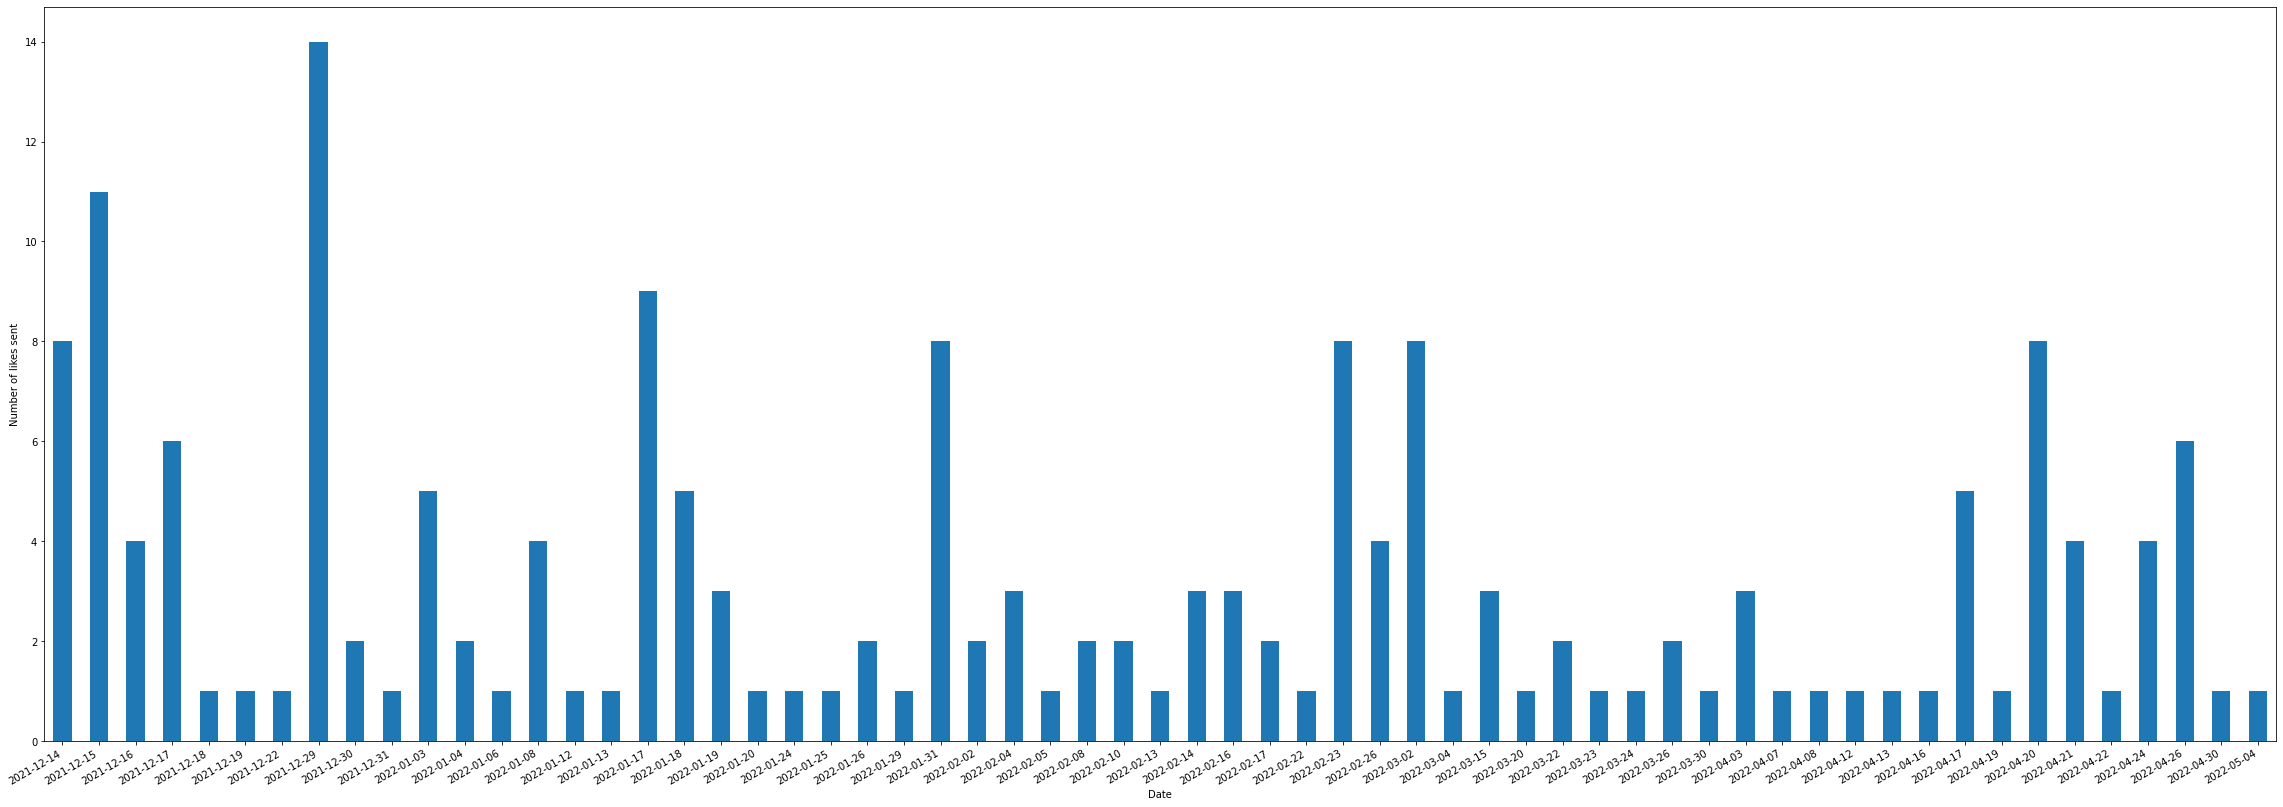

In [26]:
df['dateCount'] = df.groupby('Date')['Date'].transform('count')

pd.options.mode.chained_assignment=None
pd.set_option('display.max_rows', None)
df2 = df.drop_duplicates(subset = 'Date')
df2.sort_values(by='Date', inplace=True)
df2.plot(kind = 'bar', x = 'Date', y = 'dateCount', legend = False)
plt.gcf().autofmt_xdate()
plt.rcParams['figure.figsize'] = [40, 15]
plt.ylabel('Number of likes sent')
plt.xlabel('Date');


# Comparing the Total Type of Likes
Fortunately, the gist that we borrowed from [Michael Johnson](https://gist.github.com/mistermichaelll/3afcc33188f29576915243a5a2ea2a72) calculates statistics based on
```
Total Likes Sent: 184
Total Matches from Likes Sent: 7
Match % from Likes Sent: 4 %
Total Likes Received: 1
Total Matches from Likes Received: 1
Match % from Likes Received: 100 %
```
So, lets use this data to create a pie chart.

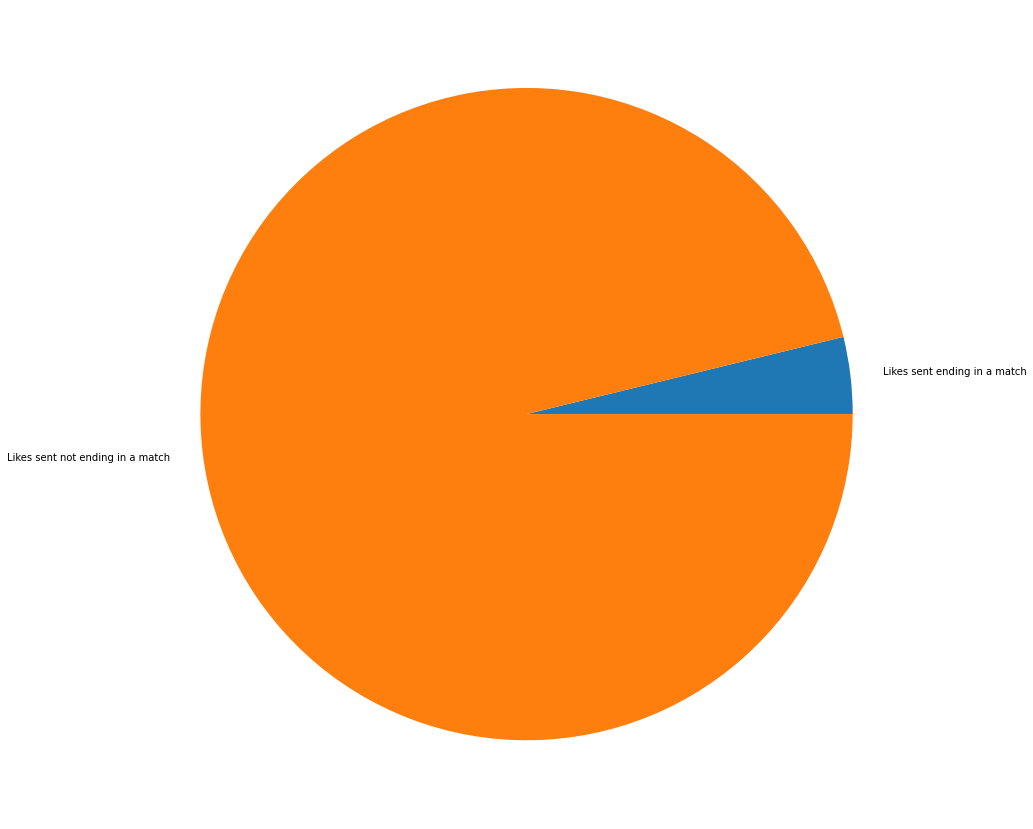

In [24]:
# Create a list which contains the labels. 
pieLabels = ['Likes sent ending in a match', 'Likes sent not ending in a match']

#Plot Pie call using the preexisting variables from the first block of code.
plt.pie([len(outgoing_matches), len(outgoing_no_matches)], labels=pieLabels);